In [38]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [3]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']
    
    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

In [8]:
binary_1mil = load_data('COMPAS_Output_1mil_copy.h5', 'BSE')
binary_merger_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 15, 15) #merger products only
merger_progenitor_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 0, 1) 

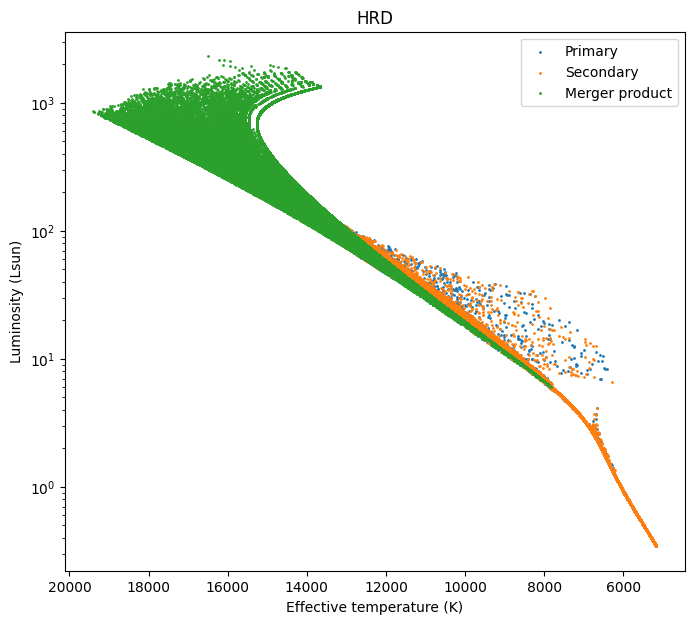

In [11]:
plt.figure(figsize=(8,7))
plt.scatter(merger_progenitor_1mil.Teff1, merger_progenitor_1mil.L1, label = 'Primary', s = 1)
plt.scatter(merger_progenitor_1mil.Teff2, merger_progenitor_1mil.L2, label = 'Secondary', s = 1)
plt.scatter(binary_merger_1mil.Teff1, binary_merger_1mil.L1, label = 'Merger product', s = 1)
plt.gca().invert_xaxis()
plt.title('HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [62]:
#data = h5.File('COMPAS_Output.h5')
data = h5.File('COMPAS_Output_1mil_copy.h5')
SP = data['BSE_System_Parameters']
#CE = data['BSE_Common_Envelopes']

In [63]:
#list(SP.keys())

In [ ]:
print(SP['SemiMajorAxis@ZAMS'].attrs['units'])

In [65]:
SP_df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()],
            #'Init_SemiMajorAxis': SP['SemiMajorAxis@ZAMS'][()],
            #'Merger': SP['Merger'][()],
            'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
            'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
        })

In [68]:
#merger_SP_df = restrict(SP_df, 'Merger', 1, 1)
merger_SP_df = restrict(restrict(SP_df, 'type1', 0, 1), 'type2', 15, 15)

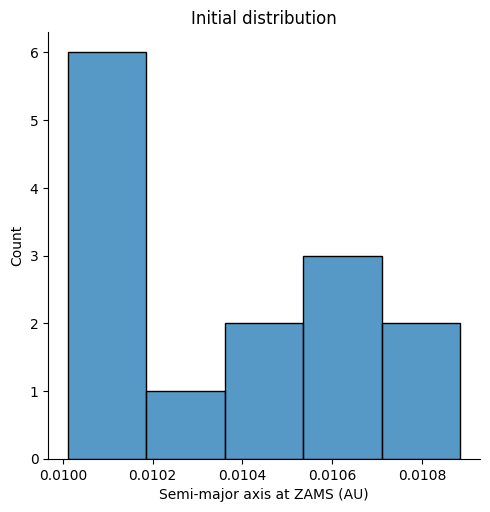

In [ ]:
ax = sns.displot(merger_SP_df, x="Init_SemiMajorAxis") #kind="kde")
ax.set(xlabel='Semi-major axis at ZAMS (AU)', ylabel='Count', title='Initial distribution')

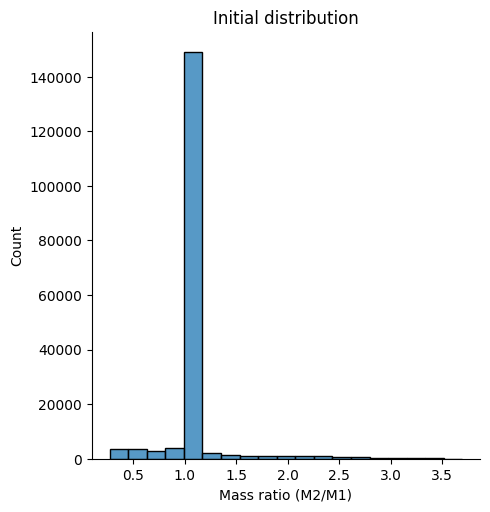

In [69]:
merger_SP_df.loc[:, "q"] = merger_SP_df.Mass_ZAMS2 / merger_SP_df.Mass_ZAMS1
ax = sns.displot(merger_SP_df, x="q") #kind="kde")
ax.set(xlabel='Mass ratio (M2/M1)', ylabel='Count', title='Initial distribution')

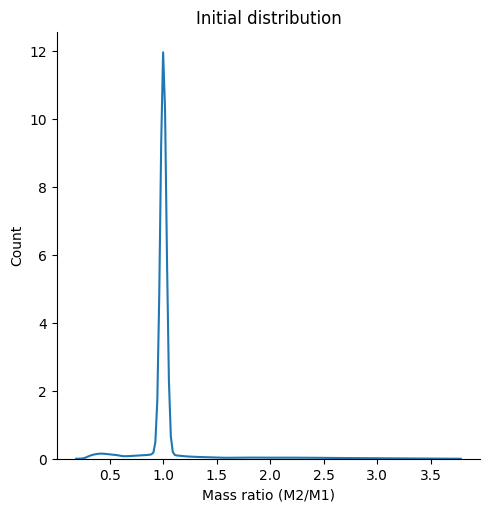

In [70]:
ax = sns.displot(merger_SP_df, x="q", kind="kde")
ax.set(xlabel='Mass ratio (M2/M1)', ylabel='Count', title='Initial distribution')